<a href="https://colab.research.google.com/github/J0AZZ/audio-analysis/blob/master/chord_recognition_preprocessing_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is primarily focused on preprocessing audio spectra to perform chord recognition tasks. The `filter()` function uses librosa to decompose the audio first into harmonic and percussive components, and lastly, only on the harmonic component, it performs voice removal for a better base-only instrument chord analysis.

In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# removes the voice and percussive elements from a given audio
def filter(song, sr):
  D = librosa.stft(song)
  D_harmonic, D_percussive = librosa.decompose.hpss(D)
  S = D_harmonic
  s, phase = librosa.magphase(D)
  S_filter = librosa.decompose.nn_filter(s, 
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
  S_filter = np.minimum(s, S_filter)
  i_mask = librosa.util.softmask(S_filter,
                                2* (s - S_filter),
                                power=2)
  pure_instrumental = s * i_mask
  return pure_instrumental


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


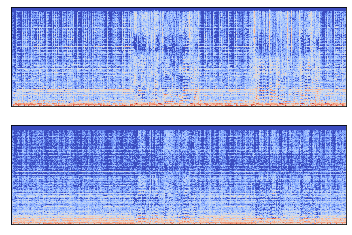

In [24]:
# example

y, sr = librosa.load(librosa.ex('fishin'), duration=30)
fig, ax = plt.subplots(2)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y)), sr=sr, ax=ax[0])
pure_instrumental = filter(y, sr)
librosa.display.specshow(librosa.amplitude_to_db(pure_instrumental), sr=sr, ax=ax[1])